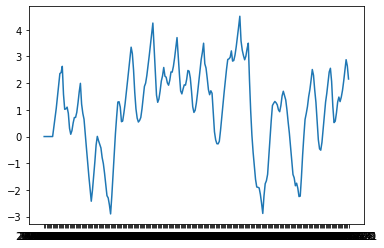

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
data=pd.read_csv("stock_prices.csv")

def get_basics(mp, lookback):
    LowestLow=mp.rolling(lookback).min()
    HighestHigh=mp.rolling(lookback).max()
    return LowestLow,HighestHigh

data['val']=0
data['fisher']=0
data['MP'] = (data.High+data.Low)/2
data['lowestlow'] = pd.DataFrame(get_basics(data['MP'],9 )[0]).rename(columns = {0:'lowestlow'})
data['highesthigh'] = pd.DataFrame(get_basics(data['MP'],9 )[1]).rename(columns = {0:'highesthigh'})
data.loc[8,'val']=2/3*((data.MP.loc[8]-data.lowestlow.loc[8])/(data.highesthigh.loc[8]-data.lowestlow.loc[8])-0.5)

for i in range(9,253):
    data.loc[i,'val']=2/3*((data.MP.loc[i]-data.lowestlow.loc[i])/(data.highesthigh.loc[i]-data.lowestlow.loc[i])-0.5)+2/3*data['val'].loc[i-1]
data.dropna()

data.loc[8,'fisher']=1/2*(np.log((1 + data.val.loc[8]) / (1 - data.val.loc[8])))
for i in range(9,253):
    data.loc[i, 'fisher']=1/2*(np.log((1 + data.val.loc[i]) / (1 - data.val.loc[i])))+1/2*data['fisher'].loc[i-1]
data.dropna()
plt.plot(data.Date, data.fisher, label= 'Fisher Transformation')
plt.show()